# Purchase Prediction

# 01 Data Exploration

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('Purchase.csv')
x = df[['Age','EstimatedSalary']] 
y = df['Purchased']
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [2]:
#Display all results in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
df.columns
df.head()
df.shape
df.describe()
df.isnull().any() # False means no missing values
df.info()

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


(400, 5)

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
#Observe Distribution of Null Values
# Create series for count of null and percentage of null
df_null = df.isnull().sum().sort_values(ascending=False)
df_null_pct =(df_null/df.shape[0]).apply(lambda x: '{:.2%}'.format(x)) #null percentage
d_type = df.dtypes

# Combine null values into dataframe
null_df = pd.DataFrame({'null_count':df_null, 
                        'null_percentage': df_null_pct,
                        'd_type':d_type})

# Observe only columns with null values
null_df[null_df.null_count>=0]

,null_count,null_percentage,d_type
Age,0,0.00%,int64
EstimatedSalary,0,0.00%,int64
Gender,0,0.00%,object
Purchased,0,0.00%,int64
User ID,0,0.00%,int64


In [5]:
import math
from pprint import pprint
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [6]:
def convert_cols_to_category(df, cols:list):
    """
    convert `cols` to `category`
    """
    for c in df[cols]:
        df[c] = df[c].astype('category')
    return df
    
def convert_obj_columns_to_category(df):
    for c in df.columns:
        col_type = df[c].dtype
        if col_type == 'object' or col_type.name == 'category':
            df[c] = df[c].astype('category')
    return df

def print_category_columns(df):
    for c in df.columns:
        col_type = df[c].dtype
        if col_type.name == 'category':
    #         print(f'{c}: {df[c].cat.categories}')
    #         print(pd.Series(df[c].cat.categories))
            print(f'{c:15}: {list(enumerate(df[c].cat.categories))}')
            print('-' * 60)
            
def plot_mn(df, cols, n_rows:int=1, kind:str='boxplot', color='green', palette='Set2'): #color = salmon
    """
    plot boxplot, violin, hist in m (rows) by n (columns)
    >>> plot_mn(df, ['Calories', 'Fat'], 2, 'hist')
    """
    n=len(cols)
    n_cols=math.ceil(n / n_rows)
    fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3, n_rows*3))
    ax=ax.ravel()
    
    fig.tight_layout()
    for i, c in enumerate(cols):
        col_type = df[c].dtype
        if col_type.name == 'category':
            sns.countplot(data=df, x=c, ax=ax[i], color=color, palette=palette)
        else:
            if kind.lower()=='boxplot':
                sns.boxplot(data=df[[c]], ax=ax[i], color=color, palette=palette)   
            elif kind.lower()=='violin':
                sns.violinplot(data=df[[c]], ax=ax[i], color=color, palette=palette)   
            elif kind.lower()=='hist':
                sns.distplot(df[c], hist=True, kde=False, ax=ax[i], color=color)

In [7]:
df.columns
df.info()

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
cols_to_cat=['Gender'] #Change here
convert_cols_to_category(df, cols_to_cat) #Convert column to category based on define function
df.info()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   User ID          400 non-null    int64   
 1   Gender           400 non-null    category
 2   Age              400 non-null    int64   
 3   EstimatedSalary  400 non-null    int64   
 4   Purchased        400 non-null    int64   
dtypes: category(1), int64(4)
memory usage: 13.1 KB


In [9]:
# Create new dataframe that only includes numerical variables
df_num = df.select_dtypes(include = np.number)
df_num.drop('User ID', axis = 1, inplace=True) #Change here

# Check data structure
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


C:\Users\Tanikan\anaconda3\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
# Crosstab of categorical variables against `Purchased = DV`
display(np.round(pd.crosstab(df['Purchased'], df['Gender'], normalize = 'columns')*100,2))

Gender,Female,Male
Purchased,,
0,62.25,66.33
1,37.75,33.67


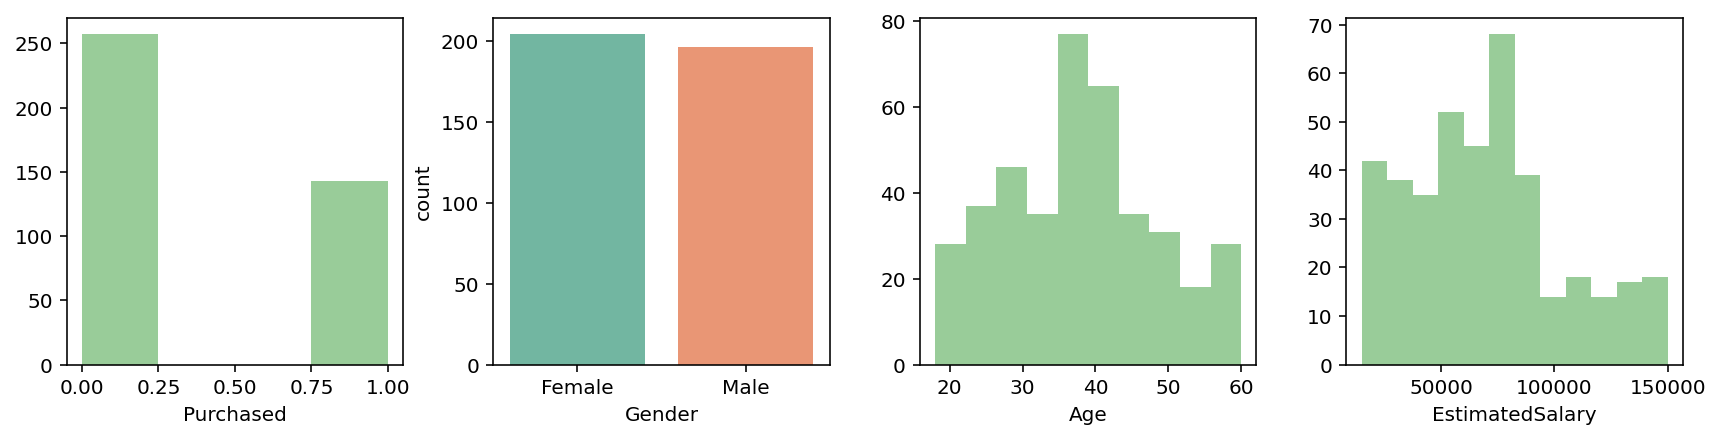

In [11]:
#Visualization

cols=['Purchased', 'Gender', 'Age', 'EstimatedSalary']  #see in def function mn
plot_mn(df, cols, 1, 'hist', color='green')

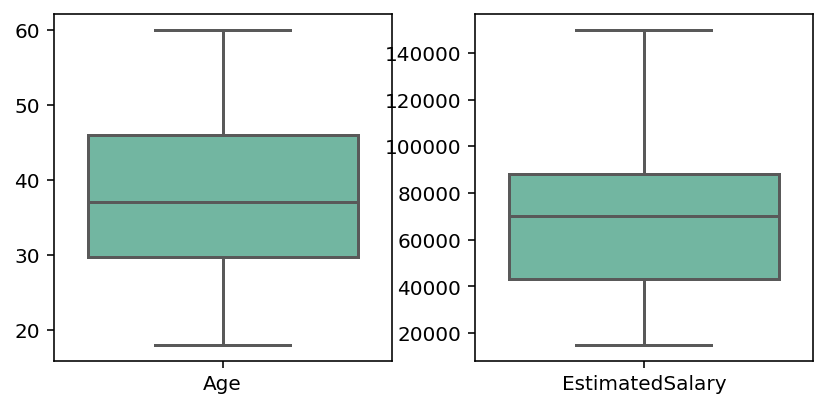

In [12]:
cols = ['Age', 'EstimatedSalary']
plot_mn(df, cols, 1, 'boxplot', palette='Set2')

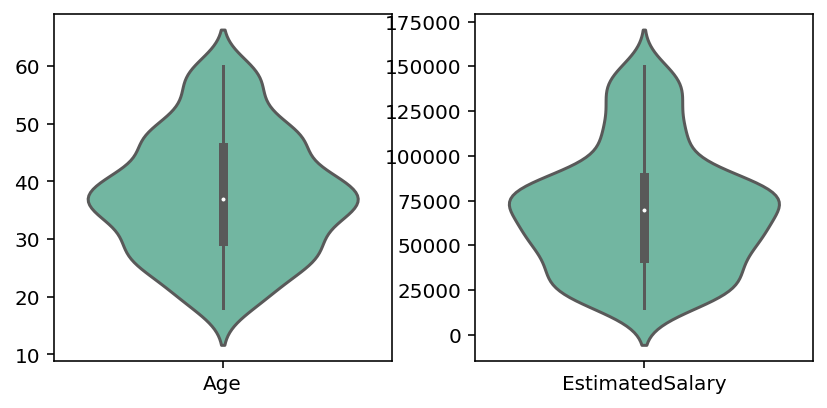

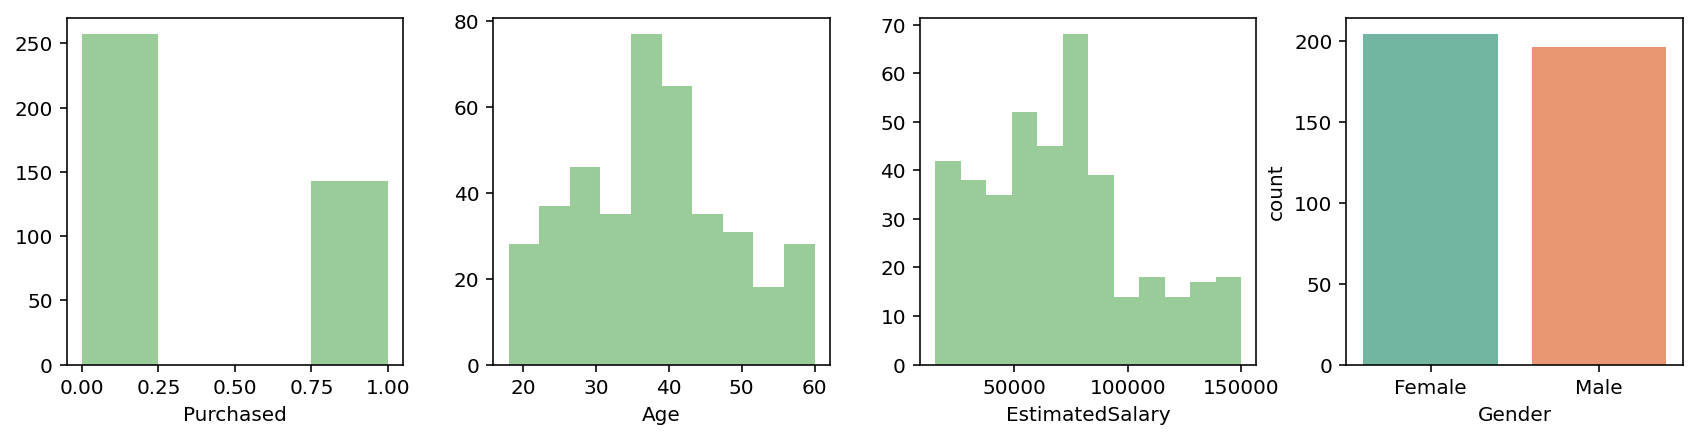

In [13]:
cols = ['Age', 'EstimatedSalary']
plot_mn(df, cols, 1, 'violin', palette='Set2')

cols = ['Purchased','Age', 'EstimatedSalary','Gender']
plot_mn(df, cols, 1, 'hist', palette='Set2')

In [14]:
# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8), dpi = 320)

# Loop through axes and plot each column
for i, ax in enumerate(fig.axes):
    ax.set_title(f"Purchased X {df_num.columns[i]}", fontsize=14)
    sns.boxplot(data=df, y=df_num.columns[i], x = 'Purchased', orient='v',ax=ax, palette='Set2')

fig.tight_layout()

Text(0.5, 1.0, 'Purchased X Age')

<AxesSubplot:title={'center':'Purchased X Age'}, xlabel='Purchased', ylabel='Age'>

Text(0.5, 1.0, 'Purchased X EstimatedSalary')

<AxesSubplot:title={'center':'Purchased X EstimatedSalary'}, xlabel='Purchased', ylabel='EstimatedSalary'>

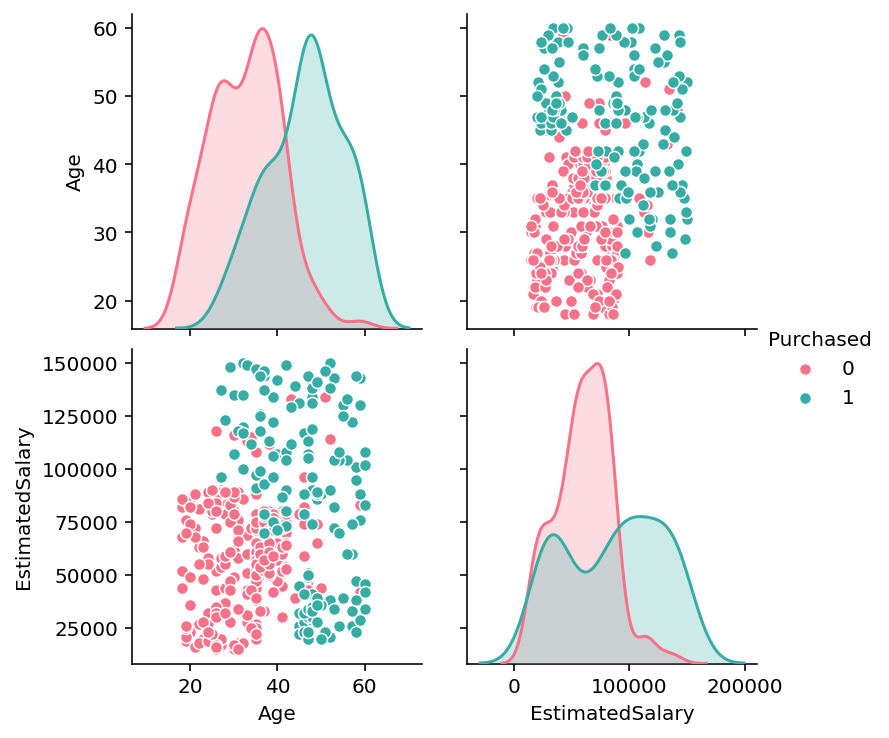

In [15]:
cols = ['Purchased','Age', 'EstimatedSalary']
sns.pairplot(df_num, hue='Purchased', palette = "husl") #Color by Product  coolwarm_r

<Figure size 576x576 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Correlation Between Numerical Variables')

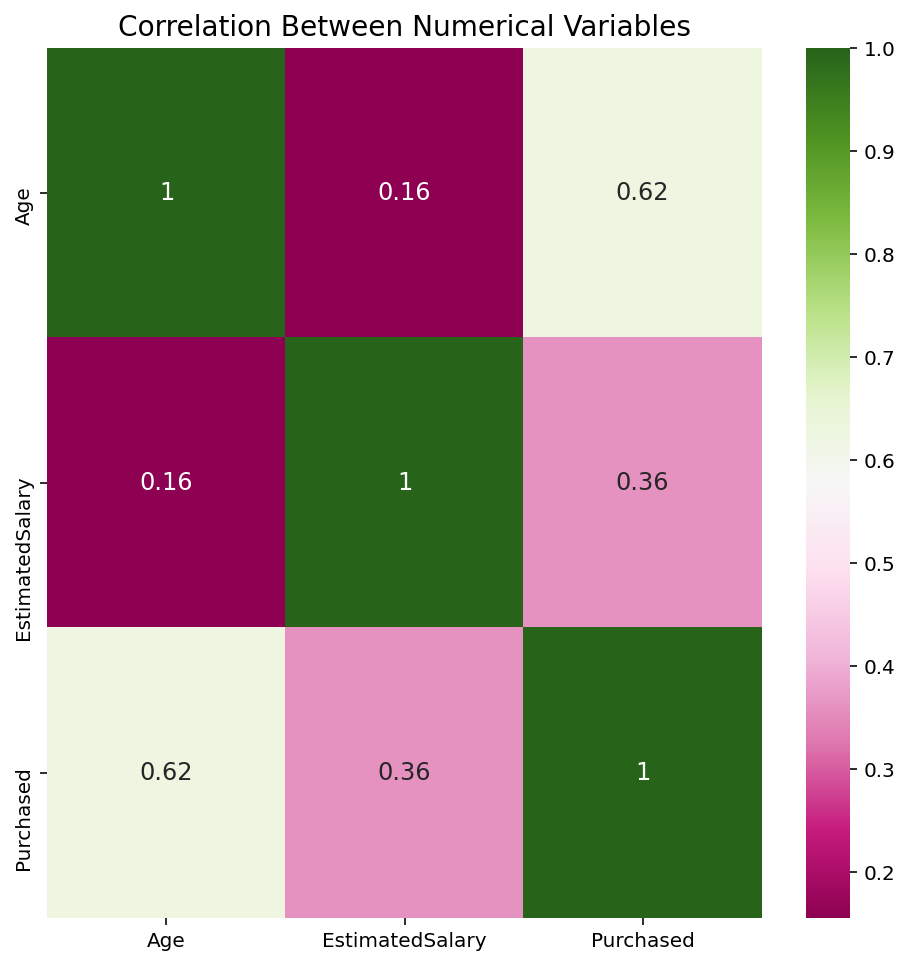

In [16]:
plt.figure(figsize=(8,8))
sns.heatmap(df_num.corr(),cbar=True,annot=True,cmap='PiYG', annot_kws={'size': 12}) #viridis #plasma cmap='Greens'
plt.title('Correlation Between Numerical Variables', fontsize=14)


<Figure size 576x576 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Correlation Between Numerical Variables')

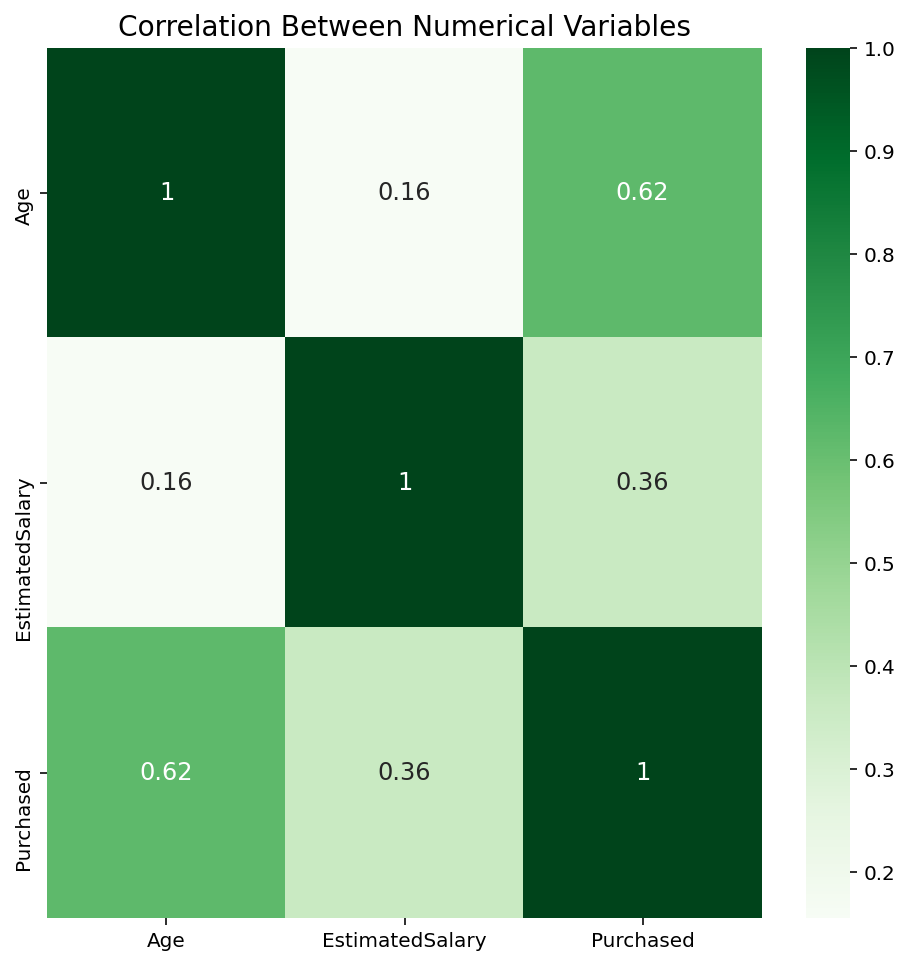

In [17]:
plt.figure(figsize=(8,8))
sns.heatmap(df_num.corr(),cbar=True,annot=True,cmap='Greens', annot_kws={'size': 12}) #viridis #plasma cmap='Greens'
plt.title('Correlation Between Numerical Variables', fontsize=14)

# 02 Train-Test Split

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state =5) 
#train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)
print(x.shape, x_train.shape, x_test.shape)

(400, 2) (300, 2) (100, 2)


In [19]:
y_train.value_counts()
y_test.value_counts()

counts1 = y_train.value_counts()
total1 = y_train.shape[0]
percent1 = counts1/total1
percent1

counts2 = y_test.value_counts()
total2 = y_test.shape[0]
percent2 = counts2/total2
percent2

0    191
1    109
Name: Purchased, dtype: int64

0    66
1    34
Name: Purchased, dtype: int64

0    0.636667
1    0.363333
Name: Purchased, dtype: float64

0    0.66
1    0.34
Name: Purchased, dtype: float64

In [22]:
#!pip install lazypredict

In [25]:
import lazypredict

#https://lazypredict.readthedocs.io/en/latest/usage.html

In [26]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.32it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SVC                                0.93               0.93     0.93      0.93   
KNeighborsClassifier               0.93               0.92     0.92      0.93   
LabelSpreading                     0.93               0.92     0.92      0.93   
NuSVC                              0.92               0.92     0.92      0.92   
QuadraticDiscriminantAnalysis      0.91               0.90     0.90      0.91   
ExtraTreesClassifier               0.89               0.88     0.88      0.89   
LabelPropagation                   0.90               0.87     0.87      0.90   
RandomForestClassifier             0.88               0.87     0.87      0.88   
GaussianNB                         0.89               0.87     0.87      0.89   
AdaBoostClassifier                 0.88               0.86     0.86      0.88   
BaggingClassifier           